In [23]:
import torch 
import matplotlib.pyplot as plt
from main import get_dataloader
from utils import get_all_amino_acids, get_wild_type_amino_acid_sequence, count_substring_mismatch
from rnn import GenerativeRNN, rnn_default_args

In [11]:
args = rnn_default_args()
args["num_data"] = 1000
args["dataset"] = "gfp_amino_acid"

In [12]:
rnn = GenerativeRNN(args)

In [13]:
# test load 
rnn.load_model("./models/rnn_test_sample_1/checkpoint_50.pt")

In [14]:
train_loader, valid_loader, test_loader = get_dataloader(args)

In [17]:
score = rnn.evaluate(test_loader)
print(score)
assert(score < 26)

24.165978515625


In [20]:
# test sample
samples = rnn.sample(1000, 238)

In [21]:
wild_type = get_wild_type_amino_acid_sequence()
mismatches = [count_substring_mismatch(sample, wild_type) for sample in samples]
print(mismatches)

[4, 8, 4, 3, 1, 5, 2, 4, 3, 190, 4, 3, 5, 3, 2, 5, 9, 5, 5, 3, 5, 3, 5, 4, 2, 2, 2, 0, 3, 8, 2, 2, 4, 192, 4, 3, 2, 3, 3, 3, 94, 2, 226, 3, 3, 4, 5, 214, 1, 1, 3, 6, 208, 4, 5, 4, 137, 3, 4, 5, 2, 3, 219, 2, 130, 5, 4, 3, 224, 5, 5, 6, 8, 8, 2, 4, 5, 2, 1, 25, 160, 2, 3, 174, 3, 4, 3, 2, 73, 5, 5, 5, 3, 3, 5, 2, 7, 3, 1, 4, 1, 3, 4, 2, 219, 4, 3, 4, 6, 3, 2, 164, 2, 8, 4, 8, 2, 1, 4, 2, 3, 8, 6, 4, 81, 4, 6, 5, 2, 143, 6, 3, 4, 3, 6, 4, 191, 3, 2, 5, 6, 3, 4, 179, 4, 1, 4, 3, 6, 2, 3, 3, 226, 3, 3, 3, 4, 6, 6, 147, 4, 4, 2, 3, 7, 3, 1, 4, 3, 1, 229, 7, 3, 7, 3, 7, 6, 3, 5, 1, 1, 2, 4, 7, 6, 3, 6, 110, 2, 4, 2, 3, 9, 2, 4, 2, 4, 2, 3, 4, 4, 168, 5, 4, 5, 5, 3, 5, 4, 4, 1, 3, 9, 8, 5, 4, 6, 4, 0, 4, 2, 4, 2, 5, 2, 2, 6, 1, 1, 168, 0, 6, 3, 3, 2, 226, 3, 5, 5, 4, 5, 2, 224, 3, 2, 3, 6, 7, 4, 2, 160, 2, 3, 0, 1, 5, 229, 109, 2, 0, 0, 93, 6, 4, 3, 4, 5, 5, 3, 2, 3, 7, 4, 5, 1, 174, 4, 172, 1, 5, 1, 4, 5, 5, 155, 4, 3, 2, 4, 4, 0, 5, 1, 5, 2, 6, 181, 93, 2, 4, 4, 9, 10, 4, 2, 5, 2, 5, 5, 6, 

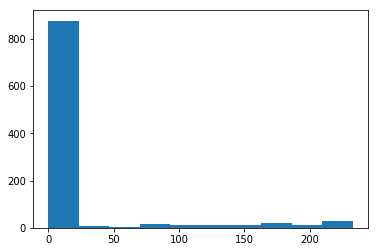

In [24]:
plt.hist(mismatches)
plt.show()


In [25]:
mismatches_20, mismatches_1000 = [sample for sample in samples if count_substring_mismatch(sample, wild_type) < 20], [sample for sample in samples if count_substring_mismatch(sample, wild_type) >= 20]

In [26]:
len(mismatches_20), len(mis)

877